In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df= pd.read_csv('/content/drive/MyDrive/Machine Learning Projects/Weather Forecasting(TS) Project By Ayush/weather_data.csv', index_col= 'date', parse_dates=(['date']))

# index_col-This parameter specifies that the 'date' column is used as the index of the DataFrame.
# parse_dates - This parameter tells pandas to parse the data in the 'date' column as datetime objects.

df

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB


# EXPLORATORY DATA ANALYSIS

In [4]:
df.isnull().sum()  # no null values

,0
meantemp,0
humidity,0
wind_speed,0
meanpressure,0


In [5]:
df.duplicated().sum()  # no duplicate values

0

# Here I will be using time series analysis to forecast the humidity of the town for the next 100 days

In [6]:
df['humidity'].describe()

,humidity
count,1462.000000
mean,60.771702
std,16.769652
min,13.428571
25%,50.375000
50%,62.625000
75%,72.218750
max,100.000000


**breakdown of the output**

---


count	1462.00	Number of non-null humidity values


mean	60.77	Average humidity


std	16.77	Standard deviation (spread of humidity values)


min	13.43	Lowest humidity value


25%	50.38	25% of the data has humidity ≤ 50.38 (Q1)


50% (median)	62.63	50% of the data has humidity ≤ 62.63


75%	72.22	75% of the data has humidity ≤ 72.22 (Q3)


max	100.0	Highest humidity value

/tmp/ipython-input-7-3510073200.py:4: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_humidity= df[['humidity']].resample('A').mean() # Average humidity for each year
/tmp/ipython-input-7-3510073200.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_humidity= df[['humidity']].resample('M').mean() # Average humidity for each month


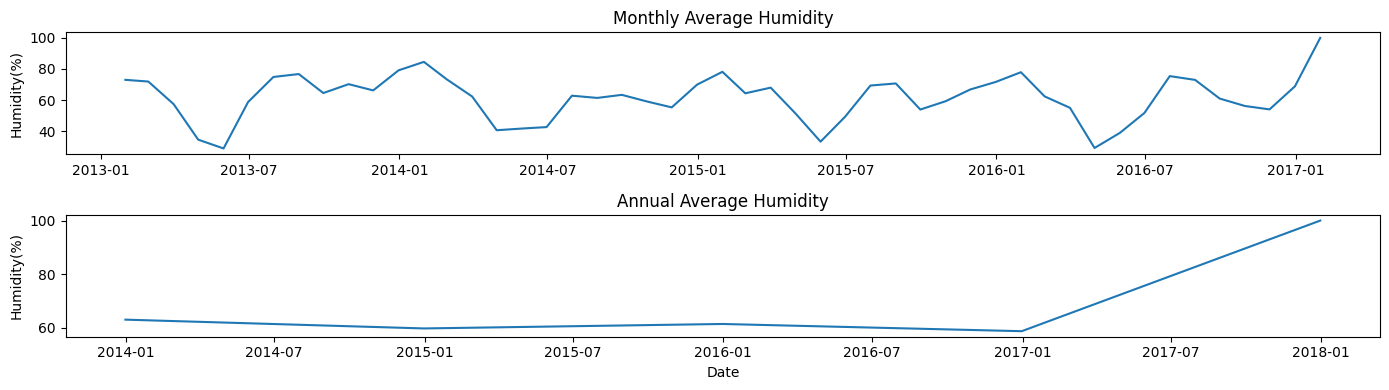

In [7]:
# PLOTTING THE DATA
fig= plt.figure(figsize=(14,4))

annual_humidity= df[['humidity']].resample('A').mean() # Average humidity for each year
monthly_humidity= df[['humidity']].resample('M').mean() # Average humidity for each month

axes= fig.subplots(2,1)

# plotting monthly humidity first
axes[0].plot(monthly_humidity)
axes[0].set_title('Monthly Average Humidity')
axes[0].set_ylabel('Humidity(%)')

# Then plotting annual humidity
axes[1].plot(annual_humidity)
axes[1].set_title('Annual Average Humidity')
axes[1].set_ylabel('Humidity(%)')
axes[1].set_xlabel('Date')


plt.tight_layout()


/tmp/ipython-input-8-842307923.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


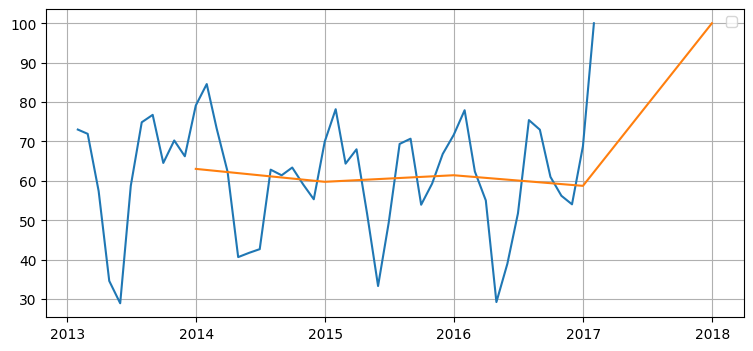

In [8]:
# creating two line plots based on the monthly_humidity and annual_humidity DataFrames.

plt.figure(figsize=(9,4))
plt.plot(monthly_humidity)
plt.plot(annual_humidity)
plt.grid(True)
plt.legend()

# PERFORMING ADF TEST TO CHECK STATIONARITY



ADF Test (Augmented Dickey-Fuller)

Purpose: Checks if a series is non-stationary or stationary

✅ If p < 0.05 → Reject H₀ → Stationary

❌ If p > 0.05 → Fail to reject H₀ → Non-stationary

In [9]:
from statsmodels.tsa.stattools import adfuller

In [10]:
def adf_test(series):
  result = adfuller(df['humidity'].dropna())
  p_value = result[1]

  if p_value <= 0.05:
    return f'p_value of the data is {round(p_value,4)} which is less than 0.05 hence, it is stationary data '
  else:
    return f'p_value of the data is {round(p_value,4)} which is not less than 0.05 hence, it is non stationary data'


In [11]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    series = series.dropna()  # Drop NaNs to avoid ADF errors
    result = adfuller(series)
    p_value = result[1]

    # Output p-value result
    if p_value <= 0.05:
        print(f'p_value of the data is {round(p_value, 4)} which is less than 0.05 hence, it is stationary data.')
    else:
        print(f'p_value of the data is {round(p_value, 4)} which is not less than 0.05 hence, it is non-stationary data.')

    # Rolling stats
    rolmean = series.rolling(window=12).mean()
    rolstd = series.rolling(window=12).std()

    # Plot
    plt.figure(figsize=(12, 4))
    plt.plot(series, color='blue', label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.grid(True)
    plt.show()


p_value of the data is 0.0045 which is less than 0.05 hence, it is stationary data.


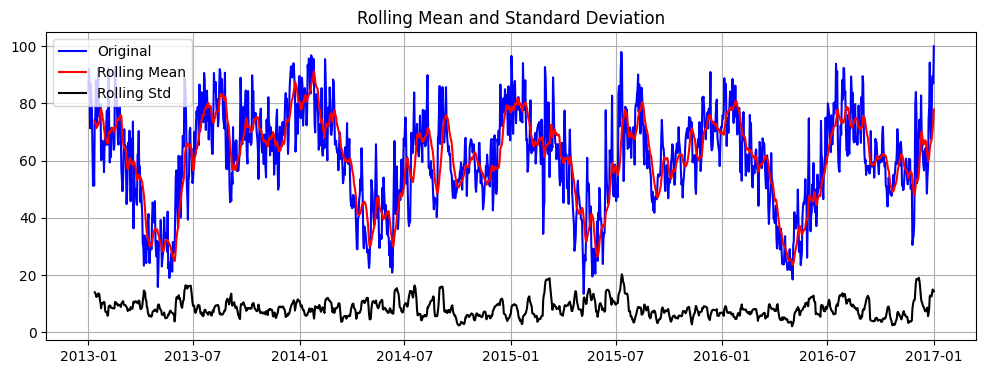

In [12]:
adf_test(df['humidity'])

# So the data is stationary , and we dont have to stationarise the data, and we plotted orignal data with rolling mean and rolling standard deviation

# Lets decompose the data using seasoanal decompose

#What is seasonal_decompose?


seasonal_decompose is a function from statsmodels that breaks down a time series into three main components:



#Trend:
 The long-term progression of the series (e.g., an upward or downward slope).

#Seasonal:
 The repeating short-term cycle (e.g., yearly, monthly effects).

#Residual (or "noise"):
What's left after removing trend and seasonality.



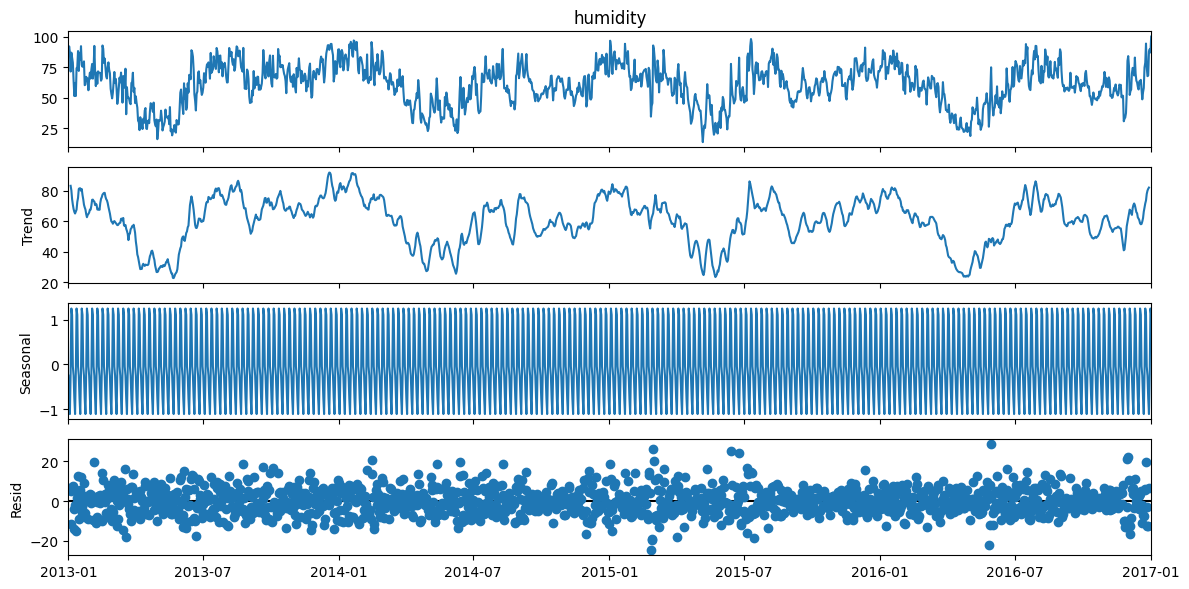

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the humidity time series into trend, seasonal, and residual components
# period=None lets the function try to infer the seasonal cycle length automatically
# The resulting plot displays: Observed data, Trend, Seasonality, and Residuals

result= seasonal_decompose(df.humidity,period = None)



# code just for plotting

fig = result.plot()             # Plot returns a Matplotlib Figure object
fig.set_size_inches(12, 6)      # Resize the figure (width=12 inches, height=6 inches)
plt.tight_layout()              # Automatically adjusts subplot params for better layout
plt.show()                      # Display the plot

#What This Humidity Plot Shows
So here, I broke down the humidity data into four parts to make it easier to understand what's really happening. Instead of just looking at one confusing line, we split it up. Here's what each part shows:

#1. Observed
This is the original humidity data — just how it was collected.
It’s got all the ups, downs, spikes, and dips mixed together.

#2. Trend
This one shows the overall direction.
It tells us whether, over time, humidity was going up, going down, or staying steady — kind of like the "big picture" without all the little noise.

#3. Seasonal
Here we can see the repeating pattern.
For example, if humidity rises and falls regularly (like daily or weekly), this line captures that.
It shows the regular rhythm in the data.

#4. Residual
This one shows the random stuff — the weird jumps or drops that don’t follow any pattern.
It’s what’s left after we take away the trend and seasonality.



# Now Using Autocorrelation function(ACF) and partial autocorrelation function (PACF)

#Autocorrelation Function (ACF)

ACF tells us how related the current value is to previous values at different time lags.

It checks:

How much today is like yesterday (lag 1)

How much today is like two days ago (lag 2)

And so on...

#Partial Autocorrelation Function (PACF)

PACF is similar to ACF but a bit smarter.

It shows the direct relationship between the current value and a past value — ignoring the influence of values in between.


In [14]:
# INSTALLING THE LIBRARY

import statsmodels.api as sm

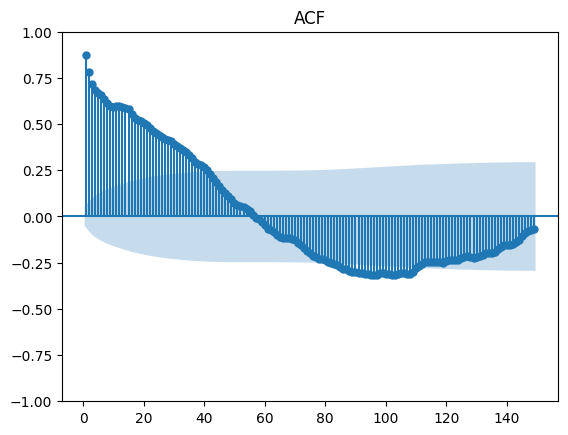

In [15]:
# PLOTTING ACF

fig = sm.tsa.graphics.plot_acf(df.humidity, lags= range(1,150), alpha= 0.05, title='ACF')

#lags=range(1,150): Shows autocorrelation for lags from 1 to 149 (i.e., how today’s humidity is related to 1, 2, 3, ..., 149 days ago).
#alpha=0.05: Adds confidence intervals (95%) — if a bar crosses the blue line, it’s statistically significant.

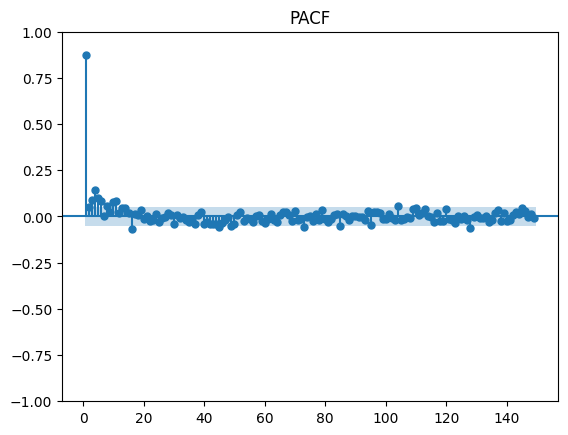

In [16]:
fig= sm.tsa.graphics.plot_pacf(df.humidity, lags= range(1,150), alpha= 0.05, title= 'PACF')

#lags=range(1,150): Shows autocorrelation for lags from 1 to 149 (i.e., how today’s humidity is related to 1, 2, 3, ..., 149 days ago).
#alpha=0.05: Adds confidence intervals (95%) — if a bar crosses the blue line, it’s statistically significant.

 # We are unable to decide the value of p and q so we will use auto arima which is having the least aic value

In [19]:
! pip install pmdarima

  Using cached pmdarima-2.0.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
Using cached pmdarima-2.0.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl (2.2 MB)


In [20]:
from pmdarima import auto_arima

In [21]:
auto_arimamodel = auto_arima(df['humidity'])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

In [22]:
auto_arimamodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1462
Model:               SARIMAX(2, 0, 3)   Log Likelihood               -5074.238
Date:                Sat, 12 Jul 2025   AIC                          10162.475
Time:                        13:10:53   BIC                          10199.488
Sample:                    01-01-2013   HQIC                         10176.282
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.7460      0.314      2.377      0.017       0.131       1.361
ar.L1          1.3177      0.116     11.328      0.000       1.090       1.546
ar.L2         -0.3297      0.113     -2.916      0.004      -0.551      -0.108
ma.L1         -0.5376      0.115     -4.667      0.000      -0.763      -0.312
ma.L2         -0.1170      0.040     -2.960      0.003      -0.194      -0.040
ma.L3         -0.1068      0.042     -2.547      0.011      -0.189      -0.025
sigma2        60.4840      1.798     33.645      0.000      56.961      64.008
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               209.15
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.66   Skew:                             0.51
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarimax_model = SARIMAX(df.humidity, order=(2,0,3), seasonal_order=(2,0,3,12)).fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [35]:
sarimax_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                           humidity   No. Observations:                 1462
Model:             SARIMAX(2, 0, 3)x(2, 0, 3, 12)   Log Likelihood               -5081.312
Date:                            Sat, 12 Jul 2025   AIC                          10184.624
Time:                                    14:58:23   BIC                          10242.788
Sample:                                01-01-2013   HQIC                         10206.320
                                     - 01-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3603      0.104     13.091      0.000       1.157       1.564
ar.L2         -0.3608      0.104     -3.481      0.000      -0.564      -0.158
ma.L1         -0.5761      0.103     -5.570      0.000      -0.779      -0.373
ma.L2         -0.1131      0.040     -2.851      0.004      -0.191      -0.035
ma.L3         -0.1060      0.042     -2.500      0.012      -0.189      -0.023
ar.S.L12       0.0710      0.613      0.116      0.908      -1.130       1.272
ar.S.L24       0.9281      0.570      1.628      0.104      -0.190       2.046
ma.S.L12      -0.0566      0.629     -0.090      0.928      -1.289       1.176
ma.S.L24      -0.9268      0.574     -1.614      0.107      -2.052       0.199
ma.S.L36      -0.0150      0.028     -0.533      0.594      -0.070       0.040
sigma2        60.9836      2.779     21.942      0.000      55.536      66.431
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               212.40
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.67   Skew:                             0.51
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#  Lets check the distribution of the residuals, and the autocorrelation plot of the residuals to check the compatibility of our model.

# Distribution and Autocorrelation of Residuals (Model Diagnostics)
After fitting the SARIMA model, it's important to check if the model has done a good job. One way to do this is by analyzing the residuals, which are simply the differences between the actual values and the predicted values.


#🟦 1. Distribution of Residuals
We plotted the residual values to check if they resemble random noise.

We used a density plot (KDE) to visualize the distribution.

The ideal shape should look like a bell curve, which means the errors are normally distributed and centered around 0.

#✅ Interpretation:
In our case, the residuals mostly follow a normal distribution, indicating that the model does not leave behind any strong bias or pattern in the prediction errors.

#🟦 2. Autocorrelation Plot of Residuals (ACF Plot)
Next, we plotted the autocorrelation of residuals using the ACF plot.

This tells us if there’s any leftover pattern in the residuals.

Ideally, the spikes in the ACF plot should stay within the confidence bands (usually shaded area).
That means the residuals are not correlated, which is what we want — they should look like white noise.

#✅ Interpretation:
Our ACF plot showed that the residuals do not have significant autocorrelation, meaning the model has likely captured the underlying structure of the data well.

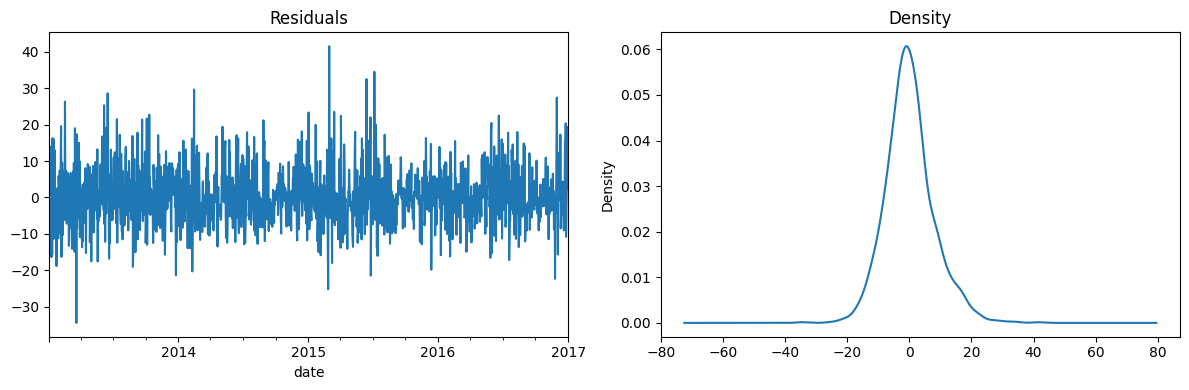

In [36]:
residuals = sarimax_model.resid[1:]            # resid gives you the difference between the actual values and the predicted values. [1:] skips the very first value (because it might be NaN or unstable right after fitting).

fig, ax = plt.subplots(1,2, figsize=(12,4))                     # fig is the overall figure —  like the whole canvas. ax is a list of Axes (individual plot areas) — in this case, two of them :  ax[0] and ax[1] as two drawing boxes placed side-by-side

residuals.plot(title = 'Residuals', ax= ax[0])  # This plots the residuals over time on the left side (first plot).It helps us check if there are any patterns left in the errors (ideally it should look like white noise).

residuals.plot(title= 'Density', kind= 'kde', ax=ax[1])   # This plots the distribution (density) of the residuals on the right side. kind='kde' makes a smooth curve showing how the residuals are distributed. Ideally, this should look like a normal (bell-shaped) curve, which means errors are random.

plt.tight_layout()
plt.show()

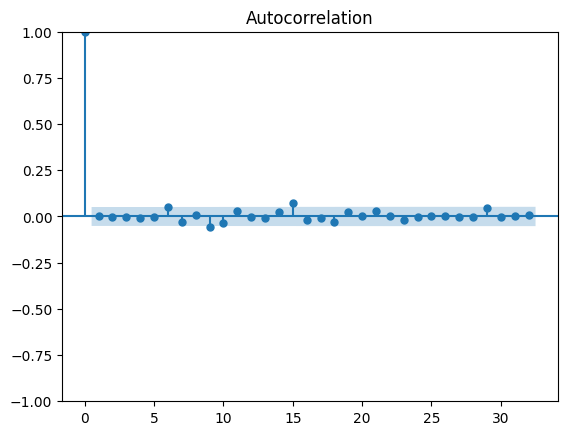

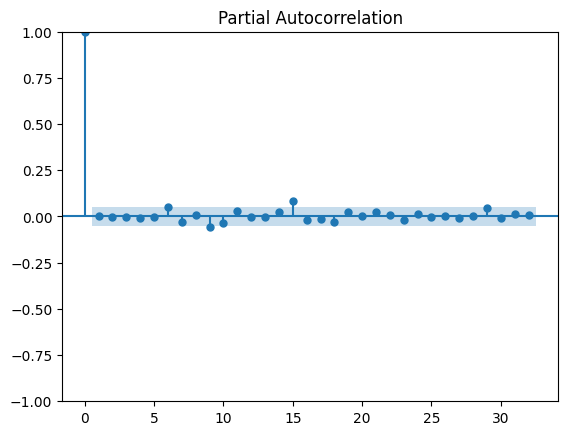

In [38]:
acf_resid = sm.tsa.graphics.plot_acf(residuals)
pacf_resid = sm.tsa.graphics.plot_pacf(residuals)

# We can see that the residuals are random and their density is exhibiting a normal distribution.
# On the other hand, there are no significant spikes in the lower lags of the ACF plot of the residuals,
# thus the residuals are close to white noise. Hence, we can proceed with the prediction and forecasting.

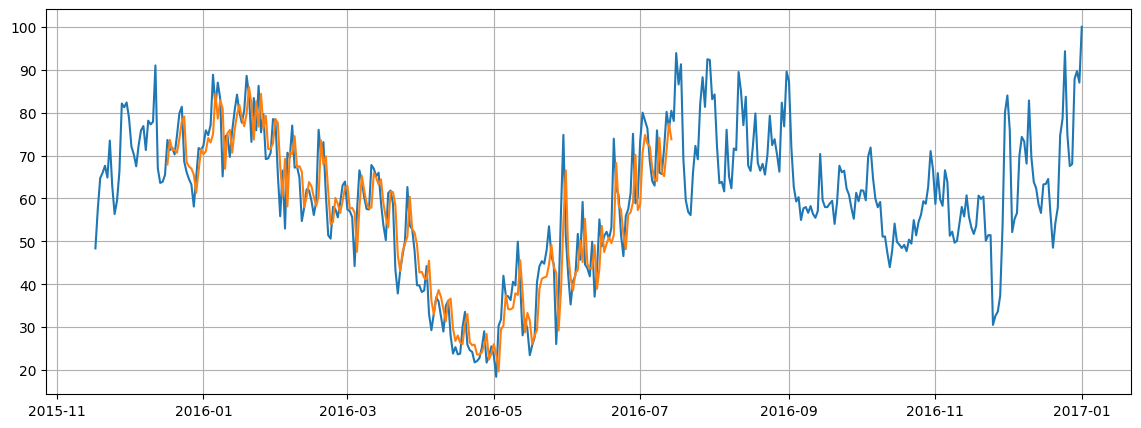

In [44]:
df['forecast'] = sarimax_model.predict(start=1080, end=1290, dynamic=False)       #It starts forecasting from the 1080th index to the 1290th index of your data DataFrame. dynamic=False means the model uses real observed data (not previously predicted values) to generate forecasts — this improves accuracy during the test phase.

plt.figure(figsize=(14,5))     #figsize=(14, 5) : 14 inches wide 5 inches tall

plt.plot(df[1050:][['humidity','forecast']])  # we are plotting both: Actual humidity values (humidity) Forecasted values (forecast) Starting from index 1050 onwards to show the trend just before and during the forecast.

plt.grid()



# We can see that the model is doing a good job of predicting humidity on our training data.
# Let’s assess the model performance on future forecasting.

# LETS FORECAST FOR NEXT 100 DAYS

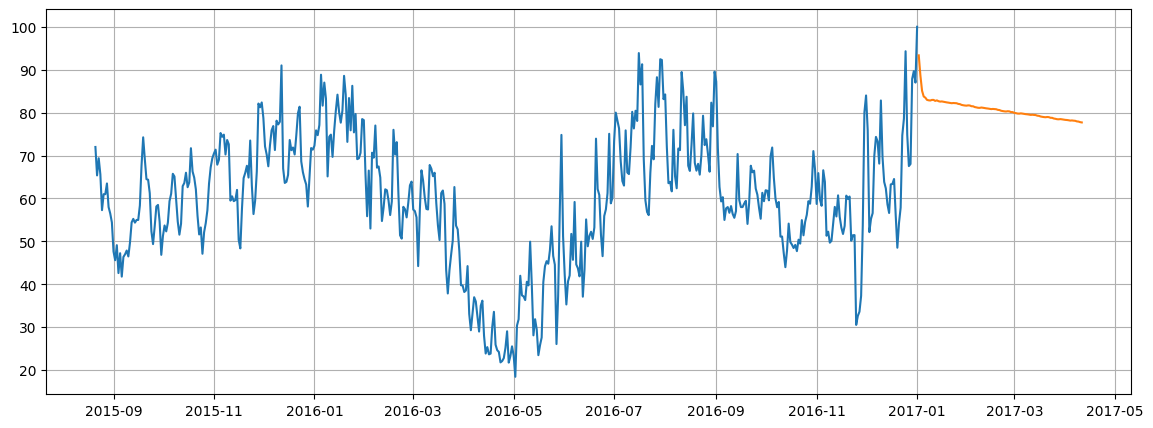

In [47]:
future_forecast = sarimax_model.get_forecast(100)               # forecasting for next 100 days

confidence_intervel = future_forecast.conf_int(alpha= 0.01)     # alpha = 0.01 means you're using a 99% confidence level (1 - alpha), so the model is 99% confident the actual value will fall within this range.

fcst = future_forecast.predicted_mean                           # This extracts the actual predicted values (point forecasts) from the forecast object. Think of this as the model’s best guess for future humidity levels.

plt.figure(figsize=(14,5))                                      # #figsize=(14, 5) : 14 inches wide 5 inches tall

plt.plot(df.humidity[-500:])                                    # df.humidity[-500:]: This plots the last 500 real humidity values, giving recent context.

plt.plot(fcst)                                                  # plt.plot(fcst): This overlays the next 100 forecasted values.

plt.grid()                                                      # grids for better readability


#🔚 Final Conclusion
The SARIMA model successfully captured the underlying seasonality and trend patterns present in the historical humidity data. The 100-day forecast demonstrates:

A smooth downward trend post-2017, aligning with the seasonal behavior of the previous year.

The forecast remains stable and realistic, with no extreme or erratic predictions, indicating good model calibration.

Residual analysis confirms that the model errors behave like white noise — i.e., no significant autocorrelation or bias — reinforcing the reliability of our predictions.

